In [1]:
%matplotlib inline
import eemeter
eemeter.samples()

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


['il-electricity-cdd-hdd-billing_bimonthly',
 'il-electricity-cdd-hdd-billing_monthly',
 'il-electricity-cdd-hdd-daily',
 'il-electricity-cdd-hdd-hourly',
 'il-electricity-cdd-only-billing_bimonthly',
 'il-electricity-cdd-only-billing_monthly',
 'il-electricity-cdd-only-daily',
 'il-electricity-cdd-only-hourly',
 'il-gas-hdd-only-billing_bimonthly',
 'il-gas-hdd-only-billing_monthly',
 'il-gas-hdd-only-daily',
 'il-gas-hdd-only-hourly',
 'il-gas-intercept-only-billing_bimonthly',
 'il-gas-intercept-only-billing_monthly',
 'il-gas-intercept-only-daily',
 'il-gas-intercept-only-hourly']

In [2]:
meter_data, temperature_data, metadata = eemeter.load_sample('il-electricity-cdd-hdd-daily')
data = eemeter.merge_temperature_data( meter_data, temperature_data, 
                                      temperature_mean=False,heating_balance_points=[60, 61], 
                                      cooling_balance_points=[70])
import json
model_fit = eemeter.caltrack_method(data)
print(len(model_fit.candidates))
print(model_fit.metadata)
print(model_fit.model)
for candidate in model_fit.candidates:
    print(candidate.model_type)
print(model_fit.r_squared)


6
{}
CandidateModel(model_type='cdd_hdd', formula='meter_value ~ cdd_70 + hdd_60', status='QUALIFIED', r_squared=0.729)
intercept_only
hdd_only
hdd_only
cdd_only
cdd_hdd
cdd_hdd
0.7294645737524558


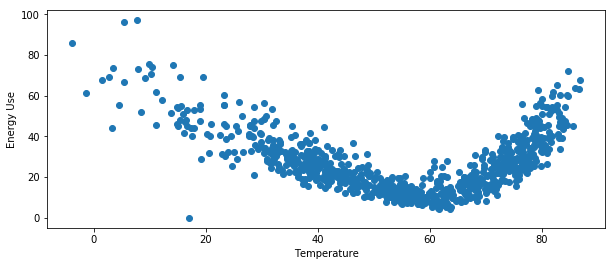

In [3]:
eemeter.plot_energy_signature(meter_data, temperature_data)

In [4]:
eemeter.caltrack_metered_savings
for candidate in model_fit.candidates:
    print(candidate.model_type)
    eemeter.caltrack_metered_savings(candidate, meter_data, temperature_data)

eemeter.caltrack_metered_savings(model_fit.model, meter_data, temperature_data)


intercept_only
<class 'pandas.core.frame.DataFrame'> 810
hdd_only
<class 'pandas.core.frame.DataFrame'> 810
hdd_only
<class 'pandas.core.frame.DataFrame'> 810
cdd_only
<class 'pandas.core.frame.DataFrame'> 810
cdd_hdd
<class 'pandas.core.frame.DataFrame'> 810
cdd_hdd
<class 'pandas.core.frame.DataFrame'> 810
<class 'pandas.core.frame.DataFrame'> 810


,reporting_observed,counterfactual_usage,metered_savings
start,,,
2015-11-22 00:00:00+00:00,32.34,39.848338,7.508338
2015-11-23 00:00:00+00:00,23.80,29.633783,5.833783
2015-11-24 00:00:00+00:00,26.26,27.544762,1.284762
2015-11-25 00:00:00+00:00,21.32,20.876438,-0.443562
2015-11-26 00:00:00+00:00,6.70,13.562225,6.862225
2015-11-27 00:00:00+00:00,12.90,20.148889,7.248889
2015-11-28 00:00:00+00:00,23.53,30.935065,7.405065
2015-11-29 00:00:00+00:00,29.90,30.363444,0.463444
2015-11-30 00:00:00+00:00,21.26,29.305383,8.045383


In [17]:
eemeter.caltrack_modeled_savings

<function eemeter.caltrack.caltrack_modeled_savings(baseline_model, reporting_model, result_index, temperature_data, degree_day_method='daily', with_disaggregated=False)>

In [23]:
#%load_ext autoreload

#%autoreload 2

from eemeter import (
    segment_timeseries, get_feature_hour_of_week, 
get_feature_occupancy,  get_feature_occupancy,  get_feature_binned_temperatures,get_baseline_data, get_design_matrix
)
import pandas as pd

hrl_meter_data, hrl_temperature_data, hrl_metadata = eemeter.load_sample('il-electricity-cdd-hdd-hourly')
merged_data = pd.DataFrame(hrl_meter_data).merge(pd.DataFrame(hrl_temperature_data),left_index=True, right_index=True).rename(columns={'value': 'meter_value','tempF': 'temperature_mean'})
                                                                                                                      
merged_data['n_days_dropped'] = 0
merged_data['n_days_kept'] = 0
baseline_data, warnings = get_baseline_data(merged_data, end=hrl_meter_data.index[-1])

baseline_data_segmented, warnings = segment_timeseries(baseline_data, segment_type='three_month_weighted')
feature_hour_of_week, hour_parameters, warnings = get_feature_hour_of_week(baseline_data_segmented)
feature_occupancy, occupancy_parameters, warnings = get_feature_occupancy(baseline_data_segmented)
 
design_matrix, preprocessors_fit, warnings = get_design_matrix(baseline_data_segmented,
                                                               functions={'get_feature_hour_of_week': {
                                                                   'function': get_feature_hour_of_week,'kwargs': {}},
                                                                          'get_feature_occupancy': {
                                                                              'function': get_feature_occupancy,
                                                                              'kwargs': {'occupancy_lookup':
                                                                                         occupancy_parameters['occupancy_lookup']}}})

#print(design_matrix)
#hourly_data = eemeter.merge_temperature_data( hrl_meter_data, hrl_temperature_data, 
#                                      degree_day_method='hourly',
#                                      temperature_mean=False,
#                                      heating_balance_points=[60, 61], 
#                                      cooling_balance_points=[70])


#baseline_data, warnings = get_baseline_data(hourly_data, end=hourly_data.index[-1])
preprocessors = {
    'segment_timeseries': {
        'function': segment_timeseries,
        'kwargs': {'segment_type': 'three_month_weighted'}},
    'get_feature_hour_of_week': {
        'function': get_feature_hour_of_week,
        'kwargs': {}
    },
    'get_feature_occupancy': {
    'function': get_feature_occupancy,
        'kwargs': {'threshold': 0.0}
                        },
    'get_feature_binned_temperatures': {
        'function': get_feature_binned_temperatures,
        'kwargs': {}}}

#formula = ('meter_value ~ C(hour_of_week) - 1 + '
#           'bin_0:occupancy + '
#           'bin_1:occupancy + bin_2:occupancy + '
#           'bin_3:occupancy + bin_4:occupancy + '
#           'bin_5:occupancy + bin_6:occupancy')

formula = ('meter_value ~ C(hour_of_week) - 1 + occupancy')
    
hrl_model_fit = eemeter.caltrack_hourly_method(baseline_data,formula, preprocessors)
print(hrl_model_fit.method_name, hrl_model_fit.model, hrl_model_fit.status, hrl_model_fit.settings, hrl_model_fit.candidates)
print('Warnings', hrl_model_fit.warnings)
print('Warnings', hrl_model_fit.model)

for warning in hrl_model_fit.warnings:
    print(warning.qualified_name, warning.description, warning.data)

print(type(hrl_temperature_data))
print(type(merged_data))
print(hrl_meter_data.columns)

# merged data has temparature_mean column, else caltrack hourly predict will complaint,
# Merged data is being used to get temparature data.
meter_savings = eemeter.caltrack_metered_savings(hrl_model_fit.model, hrl_meter_data, merged_data) 
modeled_savings = eemeter.caltrack_modeled_savings(hrl_model_fit.model, hrl_model_fit.model, hrl_temperature_data.index, 
                                 merged_data, degree_day_method='hourly', with_disaggregated=False)

print("Meter Savings")
print(meter_savings.head())
#print("modeled_savings Savings")
print(modeled_savings.head())

# Hourly meter does not generate candidates : require more investigation
#for candidate in hrl_model_fit.candidates:
#    print(candidate.model_type)
#    eemeter.caltrack_metered_savings(candidate, meter_data, temperature_data)



caltrack_hourly_method HourlyModel(segment_type='three_month_weighted', formula='meter_value ~ C(hour_of_week) - 1 + occupancy', status='SUCCESS') SUCCESS {'preprocessors': {'segment_timeseries': {'function': <function segment_timeseries at 0x7f1432fde950>, 'kwargs': {'segment_type': 'three_month_weighted'}}, 'get_feature_hour_of_week': {'function': <function get_feature_hour_of_week at 0x7f1432fdea60>, 'kwargs': {}}, 'get_feature_occupancy': {'function': <function get_feature_occupancy at 0x7f1432fded90>, 'kwargs': {'threshold': 0.0}}, 'get_feature_binned_temperatures': {'function': <function get_feature_binned_temperatures at 0x7f1432fdef28>, 'kwargs': {}}}, 'formula': 'meter_value ~ C(hour_of_week) - 1 + occupancy'} []
Warnings []
Warnings HourlyModel(segment_type='three_month_weighted', formula='meter_value ~ C(hour_of_week) - 1 + occupancy', status='SUCCESS')
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index(['value'], dtype='object')
<class 'pandas.c